linear regression : supervised learning

The RSE is considered a measure of the lack of fit of the model (3.5) to the data.

How large does the F-statistic need to be before we can reject H0 and conclude that there is a relationship? It turns out that the answer depends on the values of n and p. When n is large, an F-statistic that is just a little larger than 1 might still provide evidence against H0. In contrast, a larger F-statistic is needed to reject H0 if n is small.

Hence, if we use the individual t-statistics and associated p-values in order to decide whether or not there is any association between the variables and the response, there is a very high chance that we will incorrectly conclude that there is a relationship.

-> 개별적으로 검정하는 것은 무리가 있다라는 의미인듯

Backward selection cannot be used if p > n, while forward selection can always be used.

R2 will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. This is due to the fact that adding another variable always results in a decrease in the residual sum of squares on the training data (though not necessarily the testing data).

it is sometimes the case that an interaction term has a very small p-value, but the associated main effects (in this case, TV and radio) do not. The hier- archical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with their coefficients are not significant.

-> 개별 변수가 유의하지 않아도 교호작용은 유의하게 나온 상황이라면, 개별 변수를 제거하면 안된다

the concept of interactions applies just as well to qualitative variables, or to a combination of quantitative and qualitative variables.

If in fact there is correlation among the error terms, then the estimated standard errors will tend to underestimate the true standard errors. As a result, confidence and prediction intervals will be narrower than they should be.

In order to quantify an observation’s leverage, we compute the leverage statistic. A large value of this statistic indicates an observation with high leverage
leverage.

If a given observation has a leverage statistic that greatly exceeds (p+1)/n, then we may suspect that the corresponding point has high leverage.

공선성이 존재하면, rss에 따른 계수들의 등고선을 그렸을 때 좁은 등고선이 형성됨 (figure 3.15)

there is a broad range of values for the coefficient estimates that result in equal values for RSS

Hence a small change in the data could cause the pair of coefficient values that yield the smallest RSS

Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF).

Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF).



Advantages of parametric model
    easy to fit, because one need estimate only a small number of coefficients. In the case of linear re- gression, the coefficients have simple interpretations, and tests of statistical significance can be easily performed.

Disadvantages of parametric model
    strong assumptions about the form of f(X) 
    # 비모수 모델은 그렇지 않음 >> provide an alternative and more flexi- ble approach for performing regression

    

- KNN regression
    KNN 분류와 밀접하게 연관
    K와 xo 가 주어진 상태에서, KNN은 첫째로 xo와 가까운 K training 관측치를 식별한다.
    In general, the optimal value for K will depend on the bias-variance tradeoff
    A small value for K provides the most flexible fit, which will have low bias but high variance. because the prediction in a given region is entirely dependent on just one observation.

KNN performs slightly worse than linear regression when the relationship is linear, but much bet- ter than linear regression for non-linear situations

** In reality, even when the true relationship is highly non-linear, KNN may still provide inferior results to linear regression. In higher dimensions, KNN often performs worse than linear regression. >> results from the fact that in higher dimensions
there is effectively a reduction in sample size.

ex) spreading 50 observations over p = 20
dimensions results in a phenomenon in which a given observation has no
nearby neighbors—this is the so-called curse of dimensionality. That is,
the K observations that are nearest to a given test observation x0 may be mensionality very far away from x0 in p-dimensional space when p is large, leading to a
very poor prediction of f(x0) and hence a poor KNN fit. 

parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf

In [16]:
advertising = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

In [17]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
type(advertising)

pandas.core.frame.DataFrame

In [19]:
advertising.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


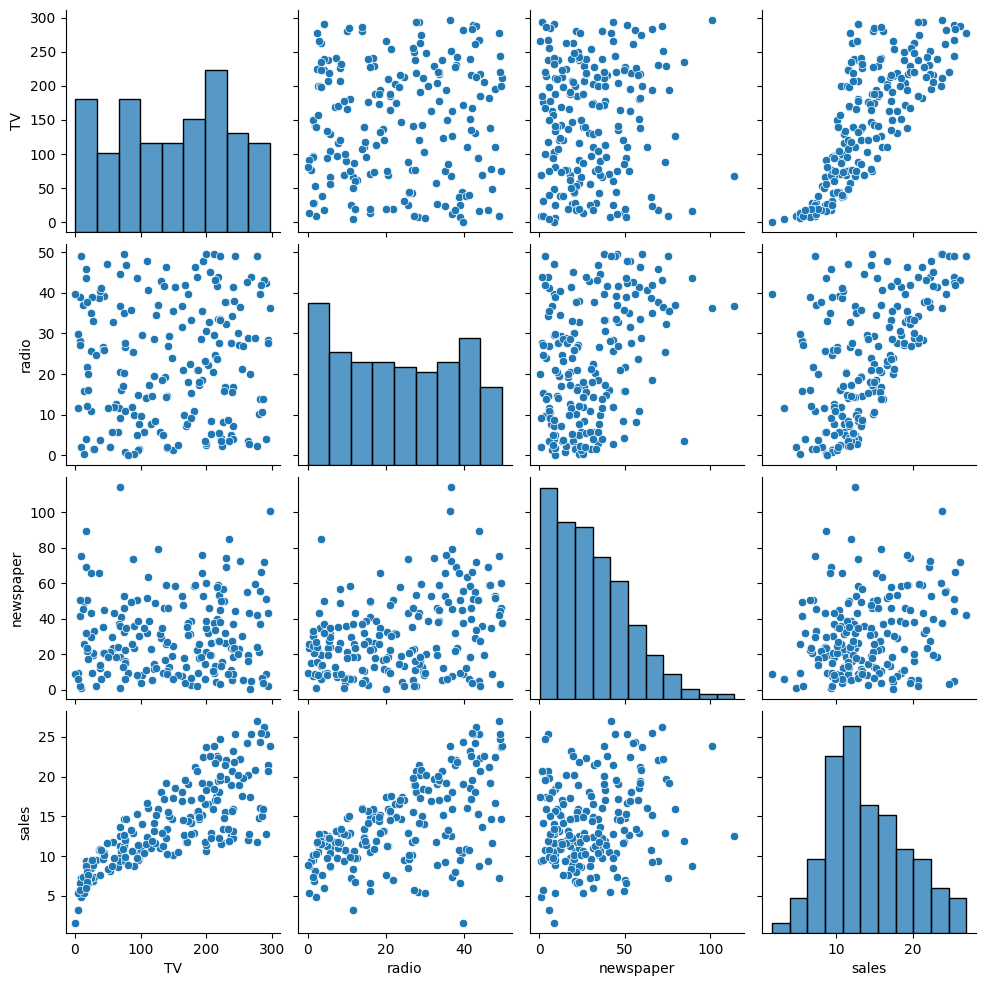

In [21]:
seaborn.pairplot(advertising)

/Users/sinchangsu/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


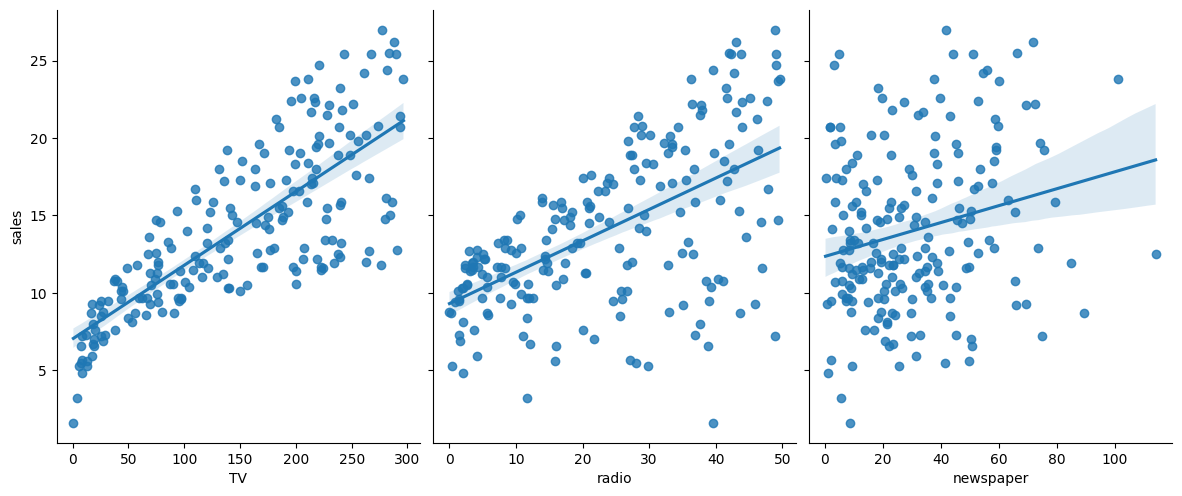

In [23]:
seaborn.pairplot(data=advertising, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], size=5, aspect=0.8, kind='reg')

In [28]:
lm=smf.ols(formula='sales~TV',data=advertising).fit()

In [33]:
print(lm.summary())
print(lm.params)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.47e-42
Time:                        17:40:34   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [34]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [35]:
lm.rsquared

0.611875050850071

/Users/sinchangsu/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


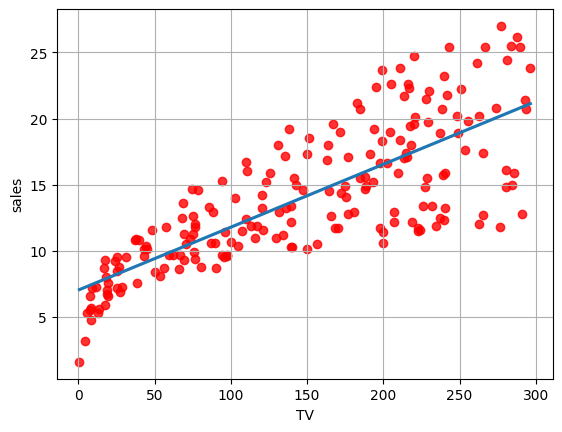

In [37]:
seaborn.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.grid()

In [42]:
lm.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [44]:
#예측prediction
x_new = pd.DataFrame({'TV':[100]})
lm.predict(x_new)

0    11.786258
dtype: float64

In [45]:
#다중회귀multiple
lm.mu1=smf.ols(formula='sales~TV+radio+newspaper',data=advertising).fit()

In [46]:
lm.mu1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        17:52:06   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
credit=pd.read_csv('data/Credit.csv')
credit.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [49]:
credit.isnull().sum()

ID           0
Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [53]:
credit.columns

Index(['ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

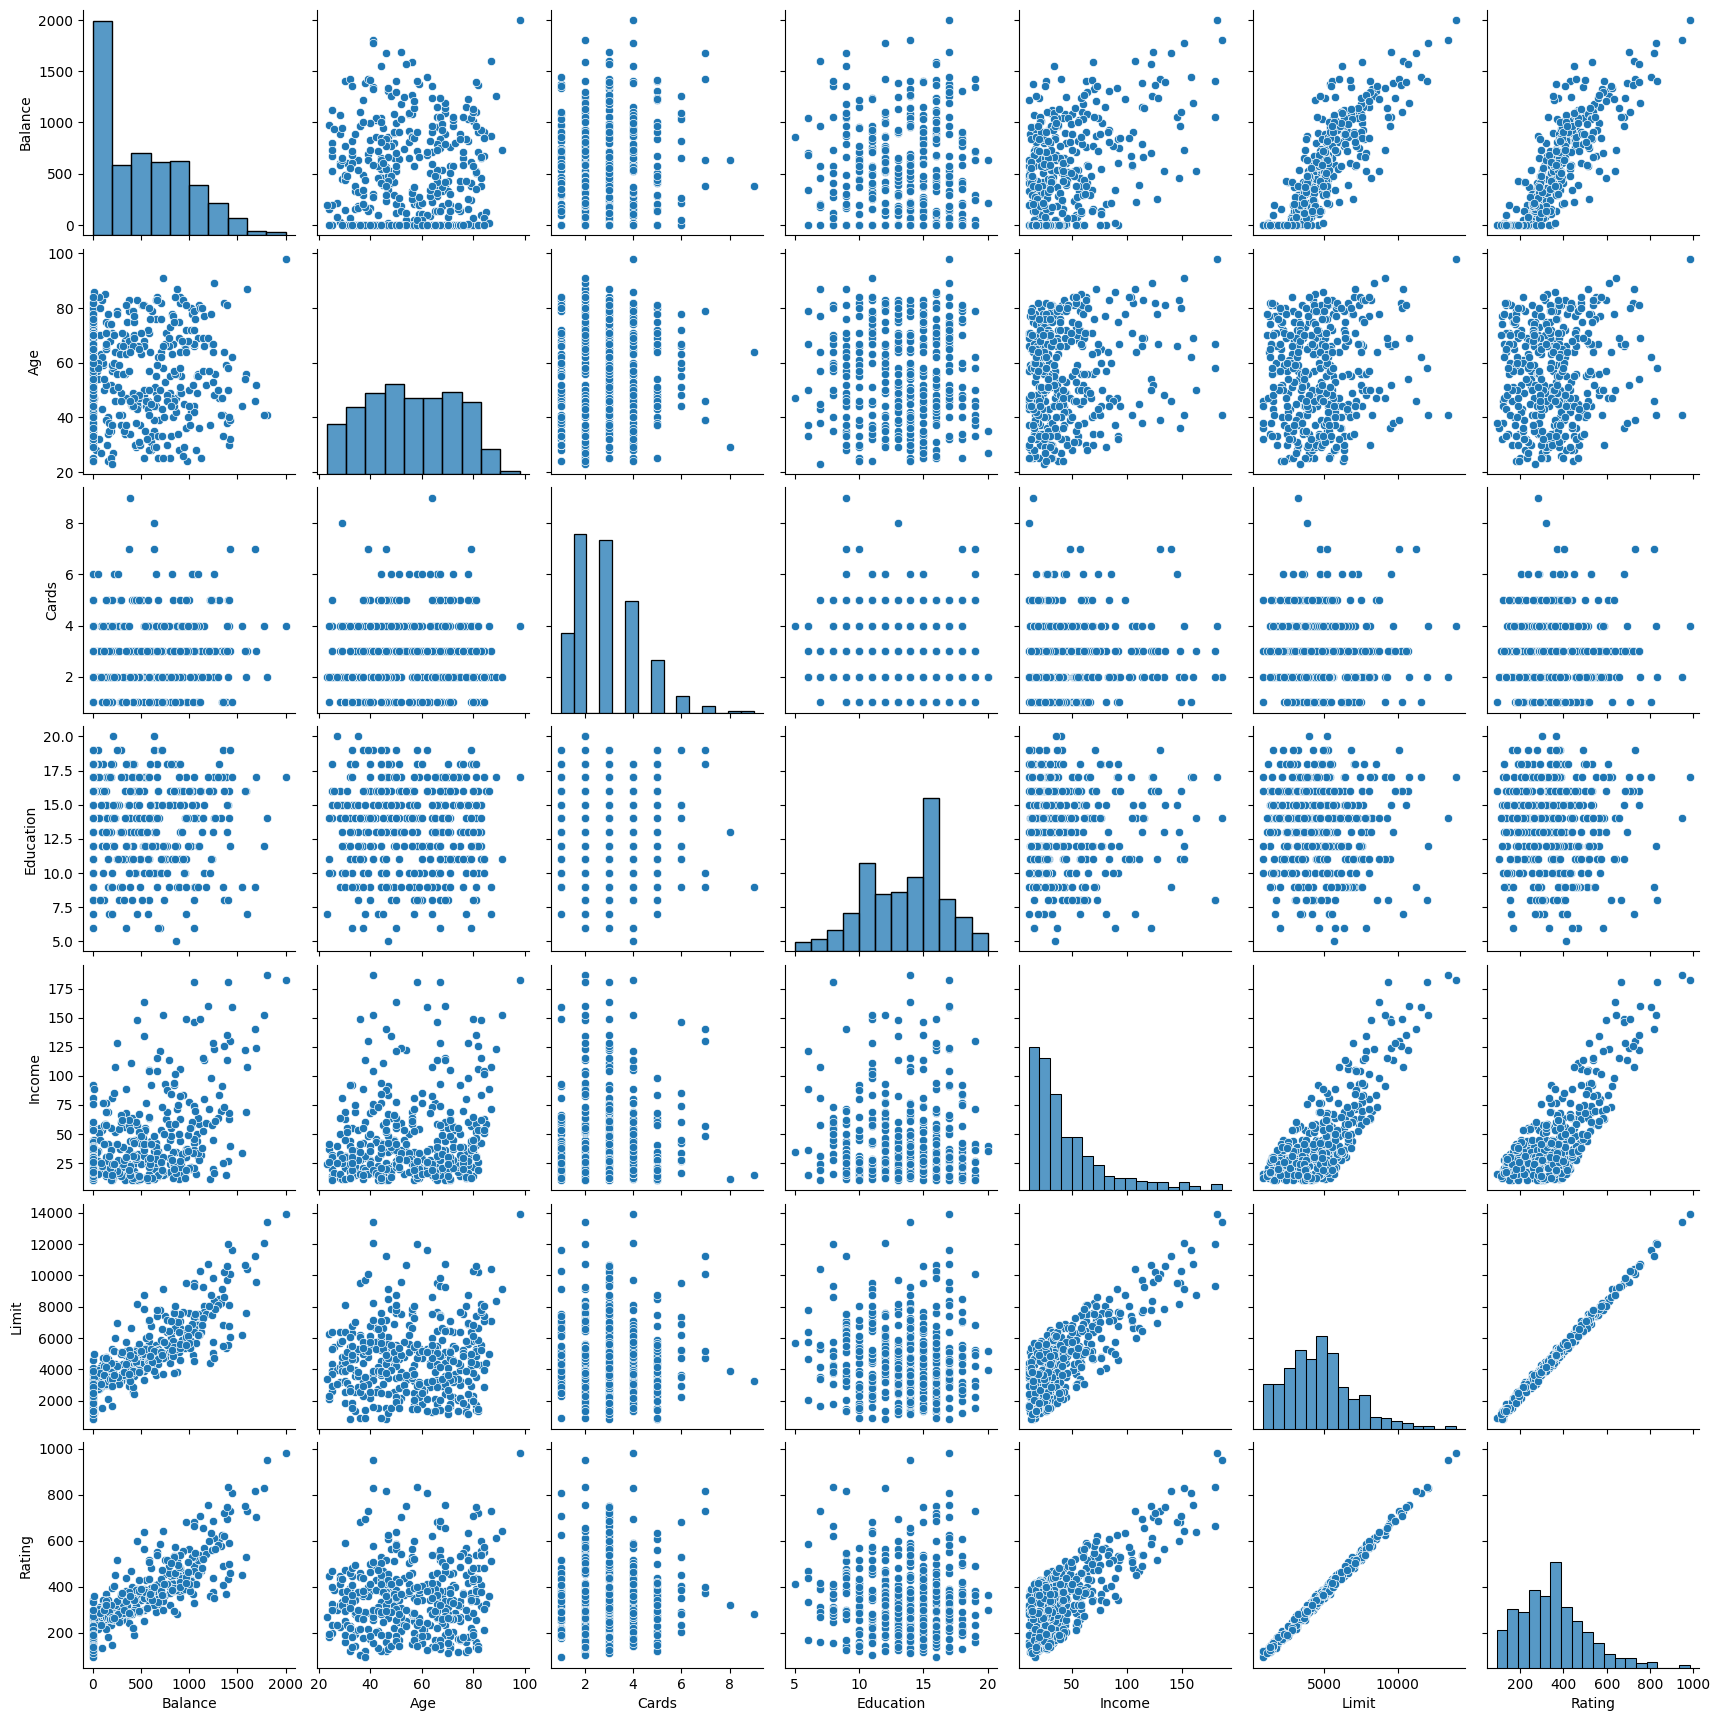

In [54]:
seaborn.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])  # ISLR - Fig 3.6


In [58]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         400 non-null    int64  
 1   Income     400 non-null    float64
 2   Limit      400 non-null    int64  
 3   Rating     400 non-null    int64  
 4   Cards      400 non-null    int64  
 5   Age        400 non-null    int64  
 6   Education  400 non-null    int64  
 7   Gender     400 non-null    object 
 8   Student    400 non-null    object 
 9   Married    400 non-null    object 
 10  Ethnicity  400 non-null    object 
 11  Balance    400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [55]:
credit.Gender.unique()

array([' Male', 'Female'], dtype=object)

In [56]:
lm_cat = smf.ols(formula='Balance ~ Gender', data=credit).fit()

In [57]:
lm_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 11 Aug 2022   Prob (F-statistic):              0.669
Time:                        18:04:51   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
credit.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

10            Caucasian
11            Caucasian
12                Asian
13            Caucasian
14     African American
             ...       
395           Caucasian
396    African American
397           Caucasian
398           Caucasian
399               Asian
Name: Ethnicity, Length: 390, dtype: object

In [73]:
smf.ols('sales ~ TV*radio', advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):          6.68e-146
Time:                        18:31:00   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
smf.ols('Balance ~ Income*Student', credit).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           4.94e-28
Time:                        18:31:54   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000     134.373     266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000     271.524     681.827
Income                    6.2182      0.592     10.502      0.000       5.054       7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
auto=pd.read_csv('data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [78]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [80]:
# auto.info()로 본 horsepower 변수 타입이 'object'로 되어 있음
# 따라서 horsepower 변수 중간 어디 즈음 숫자가 아닌 것이 있음
auto_problem = auto[auto.horsepower.apply(lambda x: not(x.isnumeric()))];auto_problem

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [93]:
# 따라서, 제거하자
auto = pd.read_csv('data/Auto.csv', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [83]:
# 이차항polynoimial
lm_quadratic = smf.ols('mpg ~ horsepower + np.square(horsepower)', data=auto).fit()
lm_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           5.40e-99
Time:                        19:19:57   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.9001      1.800     31.604      0.000      53.360      60.440
horsepower               -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.square(horsepower)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
lm_quadratic.rsquared

0.6875590305127515

In [96]:
#R처럼 변수를 다 선택해주는 것이 없으므로 다음과 같이 하자
columns_selected = "+".join(auto.columns.difference(["mpg"]))
my_formula = "mpg ~ " + columns_selected
my_formula


'mpg ~ acceleration+cylinders+displacement+horsepower+name+origin+weight+year'

In [95]:
lm_fit = smf.ols(my_formula, data=auto).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     14.80
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.84e-32
Time:                        19:27:25   Log-Likelihood:                -578.30
No. Observations:                 392   AIC:                             1771.
Df Residuals:                      85   BIC:                             2990.
Df Model:                         306                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.5760     11.589     -0.050      0.960     -23.619      22.467
name[T.amc ambassador dpl]                       3.3714      3.246      1.039      0.302      -3.082       9.825
name[T.amc ambassador sst]                       3.3643      3.271      1.029      0.307      -3.139       9.868
name[T.amc concord]                             -0.1225      3.275     -0.037      0.970      -6.634       6.389
name[T.amc concord d/l]                         -1.6865      3.423     -0.493      0.623      -8.492       5.119
name[T.amc concord dl 6]                        -0.5297      3.514     -0.151      0.881      -7.517       6.458
name[T.amc gremlin]                             -0.4266      2.958     -0.144      0.886      -6.308       5.455
name[T.amc hornet]                               0.2690      2.903      0.093      0.926      -5.503       6.041
name[T.amc hornet sportabout (sw)]              -0.4031      3.527     -0.114      0.909      -7.416       6.610
name[T.amc matador]                              0.4622      2.668      0.173      0.863      -4.842       5.766
name[T.amc matador (sw)]                         3.1189      2.894      1.078      0.284      -2.635       8.873
name[T.amc pacer]                                0.0122      3.519      0.003      0.997      -6.985       7.010
name[T.amc pacer d/l]                           -1.6820      3.517     -0.478      0.634      -8.675       5.311
name[T.amc rebel sst]                            2.8759      3.284      0.876      0.384      -3.654       9.406
name[T.amc spirit dl]                            0.7130      4.063      0.175      0.861      -7.366       8.792
name[T.audi 100 ls]                              0.1730      2.797      0.062      0.951      -5.388       5.734
name[T.audi 100ls]                              -3.8967      2.214     -1.760      0.082      -8.300       0.506
name[T.audi 4000]                                3.2416      2.734      1.186      0.239      -2.194       8.677
name[T.audi 5000]                               -4.8724      2.604     -1.871      0.065     -10.050       0.306
name[T.audi 5000s (diesel)]                     10.8897      2.618      4.160      0.000       5.685      16.095
name[T.audi fox]                                 2.4362      2.691      0.905      0.368      -2.915       7.787
name[T.bmw 2002]                                 1.3196      2.806      0.470      0.639      -4.260       6.900
name[T.bmw 320i]                                -6.0839      2.786     -2.184      0.032     -11.623      -0.545
name[T.buick century]                            2.2133      3.074      0.720      0.473      -3.898       8.325
name[T.buick century 350]       

In [90]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [97]:
lm_fit.resid.describe()

count    3.920000e+02
mean    -9.391617e-12
std      1.059280e+00
min     -5.646168e+00
25%     -1.373746e-11
50%     -9.624301e-12
75%     -4.230394e-12
max      5.646168e+00
dtype: float64